## Name and ID

Jianan Xu

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [ ]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [6]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list
list_mlp_re = []
n_runs = 16
start_time_sec = time.time()
final_time = 0
    
for i in range(16):
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    final_time = elapsed_time_sec
    list_mlp_re.append(mlp_lbfgs)
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))

final_time /= 16
print(final_time)

finished LBFGS run  0/16 after    0.1 sec |   0 iters | converged    | loss 0.347
finished LBFGS run  1/16 after    0.2 sec |   0 iters | converged    | loss 0.477
finished LBFGS run  2/16 after    0.2 sec |   0 iters | converged    | loss 0.347
finished LBFGS run  3/16 after    0.3 sec |   0 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.4 sec |   0 iters | converged    | loss 0.347
finished LBFGS run  5/16 after    0.5 sec |   0 iters | converged    | loss 0.000
finished LBFGS run  6/16 after    0.6 sec |   0 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.6 sec |   0 iters | converged    | loss 0.347
finished LBFGS run  8/16 after    0.7 sec |   0 iters | converged    | loss 0.347
finished LBFGS run  9/16 after    0.8 sec |   0 iters | converged    | loss 0.000
finished LBFGS run 10/16 after    0.9 sec |   0 iters | converged    | loss 0.347
finished LBFGS run 11/16 after    0.9 sec |   0 iters | converged    | loss 0.477
finished LBFGS r

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

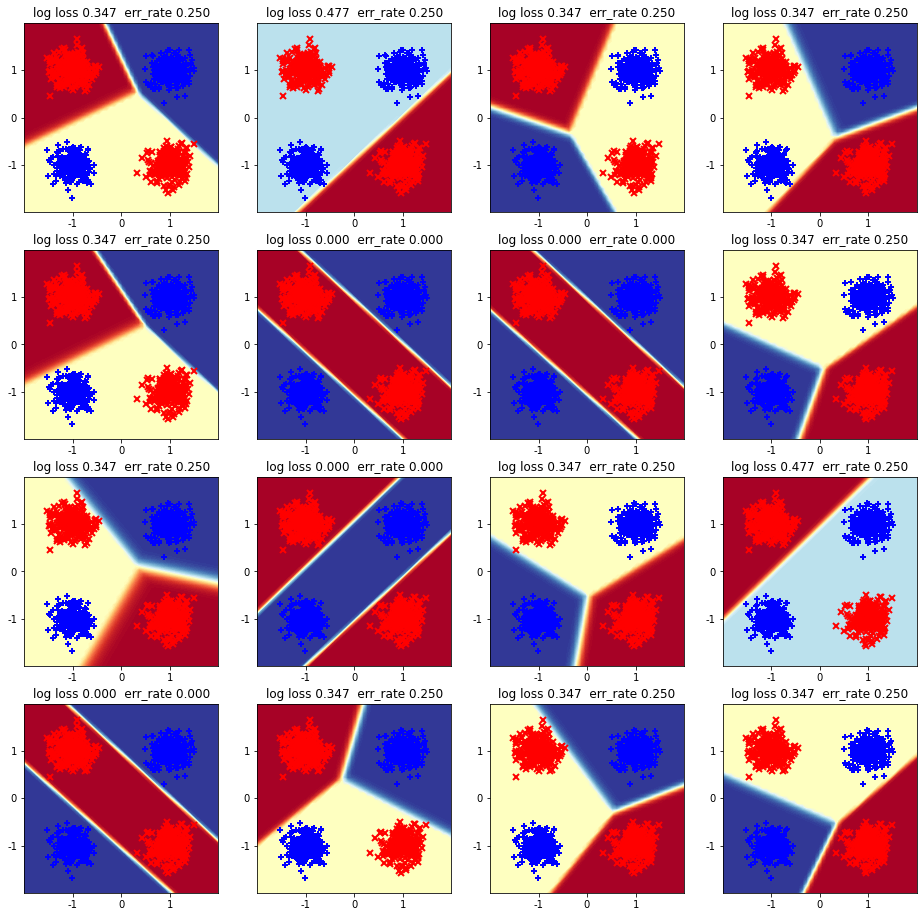

In [4]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i in range(16):
    plot_pretty_probabilities_for_clf(list_mlp_re[i], x_tr_N2, y_tr_N, ax = ax_grid.flat[i])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: There is 1/4 reach the 0 trainning error. The remainings' error rate is all 0.25. All of them in the 16 iterations are converged and they are averaged converged in 0.025 seconds. Overall, it converged really fast.
	I think the reason may be for the gradient, there are some local minimum and absolute minimum. Therefore, the error rate may vary, and when the gradient reaches the 0, this is the absolute minimum.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [5]:
list_mlp_log = []
n_runs = 16
start_time_sec = time.time()

for i in range(16):
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    list_mlp_log.append(mlp_lbfgs)
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))


finished LBFGS run  0/16 after    0.0 sec |  58 iters | converged    | loss 0.000
finished LBFGS run  1/16 after    0.1 sec | 126 iters | converged    | loss 0.347
finished LBFGS run  2/16 after    0.1 sec |  45 iters | converged    | loss 0.347
finished LBFGS run  3/16 after    0.2 sec |  80 iters | converged    | loss 0.000
finished LBFGS run  4/16 after    0.2 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  5/16 after    0.2 sec |  42 iters | converged    | loss 0.000
finished LBFGS run  6/16 after    0.3 sec |  50 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.5 sec |  42 iters | converged    | loss 0.477
finished LBFGS run  8/16 after    0.5 sec |  68 iters | converged    | loss 0.347
finished LBFGS run  9/16 after    0.6 sec | 114 iters | NOT converged | loss 0.001
finished LBFGS run 10/16 after    0.6 sec |  68 iters | converged    | loss 0.347
finished LBFGS run 11/16 after    0.7 sec | 109 iters | converged    | loss 0.347
finished LBFGS 

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

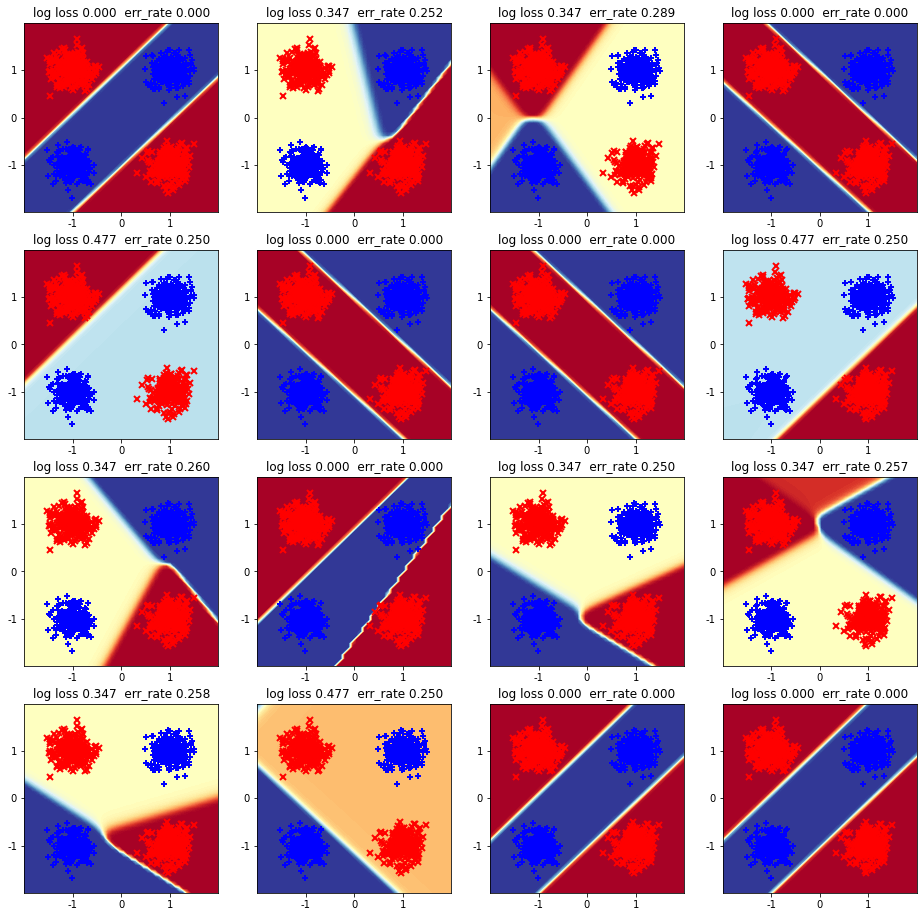

In [6]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i in range(16):
    plot_pretty_probabilities_for_clf(list_mlp_log[i], x_tr_N2, y_tr_N, ax = ax_grid.flat[i])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 7/16's runs reach 0 training error. Others are around 0.25 to 0.361. All of them in the 16 iterations are converged and they are averaged converged in 0.05 seconds. Overall, it converged really fast. 
	I think the reason may be for the gradient, there are some local minimum and absolute minimum. Therefore, the error rate may vary, and when the gradient reaches the 0, this is the absolute minimum.

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [7]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

n_runs = 16
start_time_sec = time.time()
list_mlp_re_sgd = []

for i in range(16):
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    list_mlp_re_sgd.append(mlp_sgd)
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))


finished SGD run  0/16 after    5.5 sec | 267 epochs | converged     | loss 0.347
finished SGD run  1/16 after   11.8 sec | 307 epochs | converged     | loss 0.478
finished SGD run  2/16 after   16.8 sec | 239 epochs | converged     | loss 0.347
finished SGD run  3/16 after   25.0 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  4/16 after   30.7 sec | 275 epochs | converged     | loss 0.347
finished SGD run  5/16 after   38.2 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  6/16 after   45.6 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after   50.5 sec | 273 epochs | converged     | loss 0.347
finished SGD run  8/16 after   54.4 sec | 219 epochs | converged     | loss 0.347
finished SGD run  9/16 after   61.6 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 10/16 after   68.6 sec | 394 epochs | converged     | loss 0.478
finished SGD run 11/16 after   76.5 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

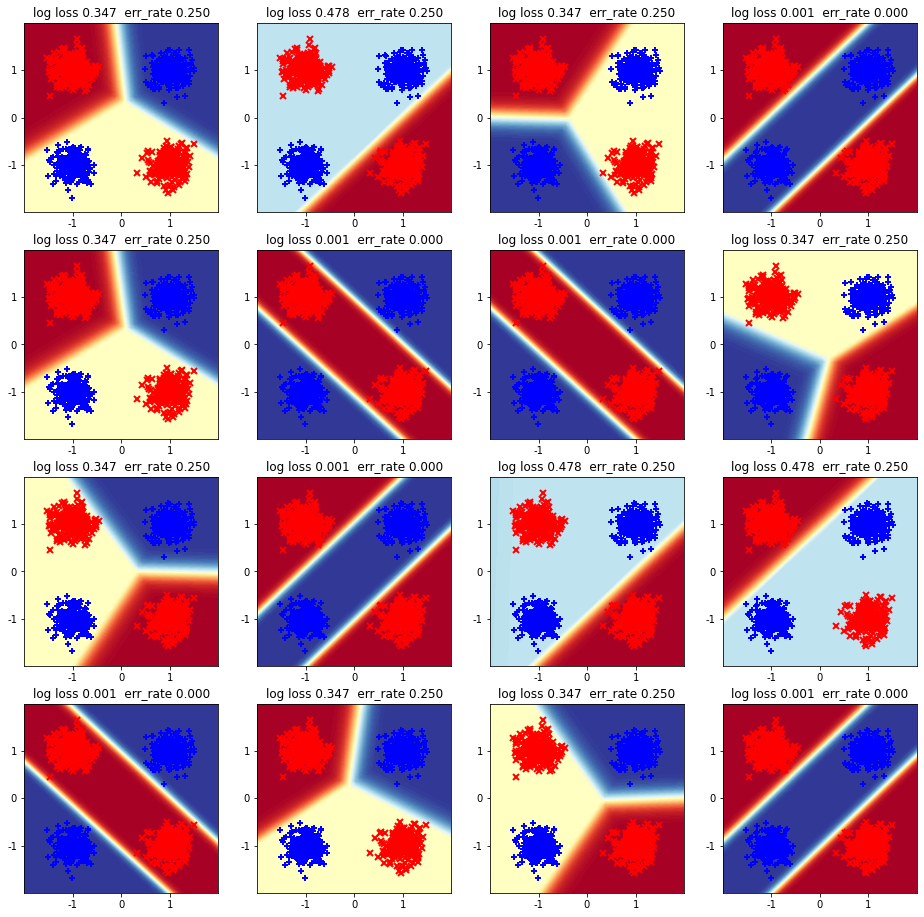

In [9]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i in range(16):
    plot_pretty_probabilities_for_clf(list_mlp_re_sgd[i], x_tr_N2, y_tr_N, ax = ax_grid.flat[i])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 3/8 of runs reach 0 training error, and others all have the same error rate, which is 0.25. In this time, only 9/16 of runs finally converged. For the converged one, the relatively fast converge is 4 seconds while the slow converge can be nearly 9 seconds. 
On the other hand, for the non-converged one, the speed is simliar.

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: The SGD solver takes much longer time to calculate, and just about half of the runs successfully converge. 
I think this may because the SGD does not do the regularization to its input, which may cause it to be slow. 
In addition, there is some local minimum, which makes the SGD think that it is already get the best solution. Therefore, the SGD cannot learn well.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [10]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation

n_runs = 16
start_time_sec = time.time()
list_mlp_log_sgd = []

for i in range(16):
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    list_mlp_log_sgd.append(mlp_sgd)
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))

finished SGD run  0/16 after    3.2 sec | 161 epochs | converged     | loss 0.693
finished SGD run  1/16 after   11.1 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  2/16 after   18.1 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  3/16 after   22.1 sec | 215 epochs | converged     | loss 0.693
finished SGD run  4/16 after   29.9 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  5/16 after   37.9 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  6/16 after   45.0 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  7/16 after   52.6 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  8/16 after   60.2 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  9/16 after   67.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 10/16 after   70.2 sec | 124 epochs | converged     | loss 0.693
finished SGD run 11/16 after   77.8 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

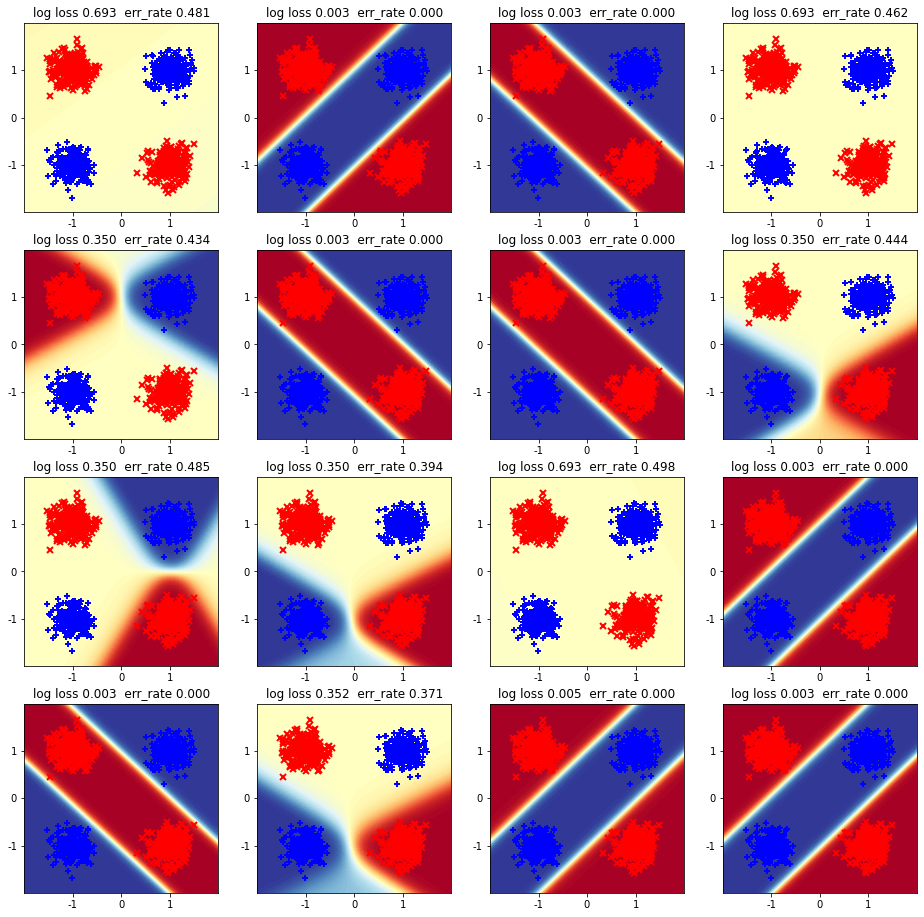

In [11]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i in range(16):
    plot_pretty_probabilities_for_clf(list_mlp_log_sgd[i], x_tr_N2, y_tr_N, ax = ax_grid.flat[i])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 1/2 of runs reach 0 training error, and the others are about 0.371 to 0.498. In this time, Only 3/16 of runs finally converged. For the converged one, the relatively fast converge is 3 seconds while the slow converge can be nearly 6 seconds. 
On the other hand, for the non-converged one, the speed is simliar. 

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: The SGD solver takes much longer time to calculate, and just a little runs successfully converge. 
I think this may because the SGD does not do the regularization to its input, which may cause it to be slow. 
In addition, there is some local minimum, which makes the SGD think that it is already get the best solution. Therefore, the SGD cannot learn well.

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

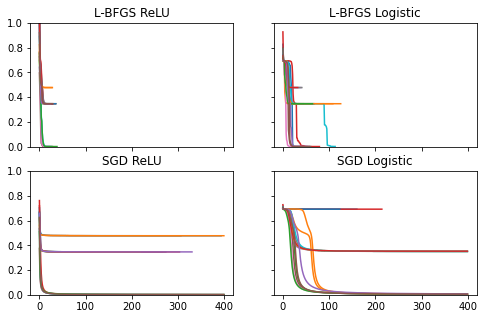

In [12]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
for i in range(16):  
    ax_grid[0,0].set_title('L-BFGS ReLU')
    ax_grid[0,0].plot(list_mlp_re[i].loss_curve_)
    
    ax_grid[0,1].set_title('L-BFGS Logistic')
    ax_grid[0,1].plot(list_mlp_log[i].loss_curve_)

    ax_grid[1,0].set_title('SGD ReLU')
    ax_grid[1,0].plot(list_mlp_re_sgd[i].loss_curve_)
    
    ax_grid[1,1].set_title('SGD Logistic')
    ax_grid[1,1].plot(list_mlp_log_sgd[i].loss_curve_)
    
    
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** All ReLU seems easier to optimize, and all Logistic Sigmoid requires more iterations.

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: 1. compare two functions with other different classfications
         2. compare two functions with other different solvers
         3.compare two functions with other different hypeparameters
         (all do the compare experiment for the same data)